##  분산투자

In [5]:
import FinanceDataReader as fdr
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

In [6]:
# 데이터 가져오기

samsung = fdr.DataReader("005930", "2017") # 삼성전자
kakao = fdr.DataReader("035720", "2017") # 카카오 
sk = fdr.DataReader("000660", "2017") # sk하이닉스
naver = fdr.DataReader("035420", "2017") # 네이버
hyundai = fdr.DataReader("005380", "2017") # 현대차

print(samsung.head())
print(kakao.head())
print(sk.head())
print(naver.head())
print(hyundai.head())

             Open   High    Low  Close  Volume    Change
Date                                                    
2017-01-02  35980  36240  35880  36100   93012  0.001665
2017-01-03  36280  36620  36020  36480  147153  0.010526
2017-01-04  36500  36520  36100  36160  159435 -0.008772
2017-01-05  36060  36060  35540  35560  219349 -0.016593
2017-01-06  36180  36440  36040  36200  177619  0.017998
             Open   High    Low  Close   Volume    Change
Date                                                     
2017-01-02  15534  15574  15373  15394   143140 -0.003947
2017-01-03  15495  16057  15454  16057   445180  0.043069
2017-01-04  16137  17080  16117  16920  1224395  0.053746
2017-01-05  17060  17261  16860  16860   611713 -0.003546
2017-01-06  16940  16960  16498  16800   410880 -0.003559
             Open   High    Low  Close   Volume    Change
Date                                                     
2017-01-02  44750  46000  44600  45800  1547681  0.024609
2017-01-03  46200  47

In [7]:
# 결측치 검사
print(pd.isnull(samsung).sum())
print(pd.isnull(kakao).sum())
print(pd.isnull(sk).sum())
print(pd.isnull(naver).sum())
print(pd.isnull(hyundai).sum())

Open      0
High      0
Low       0
Close     0
Volume    0
Change    0
dtype: int64
Open      0
High      0
Low       0
Close     0
Volume    0
Change    0
dtype: int64
Open      0
High      0
Low       0
Close     0
Volume    0
Change    0
dtype: int64
Open      0
High      0
Low       0
Close     0
Volume    0
Change    0
dtype: int64
Open      0
High      0
Low       0
Close     0
Volume    0
Change    0
dtype: int64


### 삼성전자 단일 종목 투자성과

In [8]:
samsung.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2017-01-02,35980,36240,35880,36100,93012,0.001665
2017-01-03,36280,36620,36020,36480,147153,0.010526
2017-01-04,36500,36520,36100,36160,159435,-0.008772
2017-01-05,36060,36060,35540,35560,219349,-0.016593
2017-01-06,36180,36440,36040,36200,177619,0.017998


In [9]:
# 삼성전자 단일 종목 일간 수익률
samsungDayReturn = (samsung['Close'] / samsung['Close'].shift(1)).fillna(1)
samsungDayReturn

Date
2017-01-02    1.000000
2017-01-03    1.010526
2017-01-04    0.991228
2017-01-05    0.983407
2017-01-06    1.017998
                ...   
2022-06-07    0.980539
2022-06-08    0.996947
2022-06-09    0.998469
2022-06-10    0.978528
2022-06-13    0.973354
Name: Close, Length: 1337, dtype: float64

In [10]:
# 삼성전자 누적수익률
samsungCumulativeReturn = samsungDayReturn.cumprod()
samsungCumulativeReturn

Date
2017-01-02    1.000000
2017-01-03    1.010526
2017-01-04    1.001662
2017-01-05    0.985042
2017-01-06    1.002770
                ...   
2022-06-07    1.814404
2022-06-08    1.808864
2022-06-09    1.806094
2022-06-10    1.767313
2022-06-13    1.720222
Name: Close, Length: 1337, dtype: float64

In [11]:
#  누적수익률을 구하는 다른 방법
samsungCumulativeReturn = samsung['Close'] / samsung['Close'].iloc[0]
samsungCumulativeReturn

Date
2017-01-02    1.000000
2017-01-03    1.010526
2017-01-04    1.001662
2017-01-05    0.985042
2017-01-06    1.002770
                ...   
2022-06-07    1.814404
2022-06-08    1.808864
2022-06-09    1.806094
2022-06-10    1.767313
2022-06-13    1.720222
Name: Close, Length: 1337, dtype: float64

In [13]:
# cagr
samsungCagr = samsungCumulativeReturn.iloc[-1] ** (252 / len(samsung))

# mdd 
samsungDd = (samsungCumulativeReturn.cummax() - samsungCumulativeReturn) / samsungCumulativeReturn.cummax() * 100 
samsungMdd = samsungDd.max()

print("cagr: ", samsungCagr)
print("mdd: ", samsungMdd)

cagr:  1.1076520154947116
mdd:  34.55085634393569


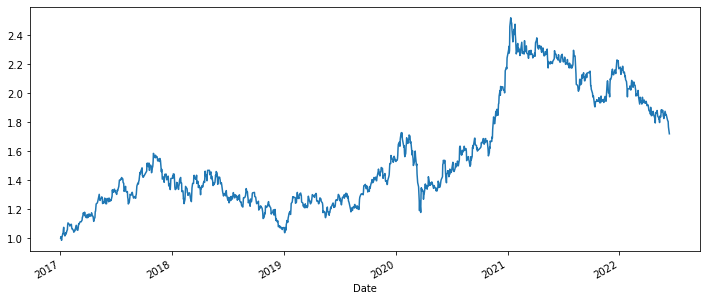

In [14]:
# 시각화
plt.figure(figsize=(12, 5))
samsungCumulativeReturn.plot()
plt.show()

### 5개 종목 분산 투자 성과와 누적 수익률 곡선

In [17]:
stocks = [samsung, kakao, sk, naver, hyundai]

data = pd.DataFrame()

for stock in stocks:
    data = pd.concat([data, stock['Close']], axis=1)

data.columns = ["samsung", "kakao", "sk", "naver", "hyundai"]

data

,samsung,kakao,sk,naver,hyundai
2017-01-02,36100,15394,45800,155620,150000
2017-01-03,36480,16057,47250,153617,153000
2017-01-04,36160,16920,46500,162230,154000
2017-01-05,35560,16860,46950,158424,153500
2017-01-06,36200,16800,48000,160026,151000
...,...,...,...,...,...
2022-06-07,65500,81900,104000,278000,183500
2022-06-08,65300,81500,106000,278000,183000
2022-06-09,65200,81300,105500,273000,182500
2022-06-10,63800,80100,103500,270000,184500


In [20]:
# 개별자산 누적 수익률
cumReturn = data / data.iloc[0]
cumReturn

,samsung,kakao,sk,naver,hyundai
2017-01-02,1.000000,1.000000,1.000000,1.000000,1.000000
2017-01-03,1.010526,1.043069,1.031659,0.987129,1.020000
2017-01-04,1.001662,1.099130,1.015284,1.042475,1.026667
2017-01-05,0.985042,1.095232,1.025109,1.018018,1.023333
2017-01-06,1.002770,1.091334,1.048035,1.028313,1.006667
...,...,...,...,...,...
2022-06-07,1.814404,5.320255,2.270742,1.786403,1.223333
2022-06-08,1.808864,5.294270,2.314410,1.786403,1.220000
2022-06-09,1.806094,5.281278,2.303493,1.754273,1.216667
2022-06-10,1.767313,5.203326,2.259825,1.734996,1.230000


In [21]:
# 포트폴리오 비율 : 동일 가중
portWeight = [1 / len(data.columns)] * len(data.columns)
portWeight

[0.2, 0.2, 0.2, 0.2, 0.2]

In [22]:
# 누적 수익률
portCumReturn = (portWeight * cumReturn).sum(axis=1)
portCumReturn

2017-01-02    1.000000
2017-01-03    1.018477
2017-01-04    1.037043
2017-01-05    1.029347
2017-01-06    1.035424
                ...   
2022-06-07    2.483028
2022-06-08    2.484790
2022-06-09    2.472361
2022-06-10    2.439092
2022-06-13    2.330022
Length: 1337, dtype: float64

## 일간 수익률 계산

### 간단한 방법 -> 역연산

In [23]:
portDayReturn = (portCumReturn / portCumReturn.shift(1)).fillna(1)
portDayReturn

2017-01-02    1.000000
2017-01-03    1.018477
2017-01-04    1.018230
2017-01-05    0.992578
2017-01-06    1.005904
                ...   
2022-06-07    0.966318
2022-06-08    1.000710
2022-06-09    0.994998
2022-06-10    0.986544
2022-06-13    0.955283
Length: 1337, dtype: float64

### 간단하지 않은 방법 -> 비율 계산